📄 **Notebook `2_exploratory_data_analysis.ipynb`**

Notebook ini merupakan tahap kedua dari proyek **Electricity Load Forecasting with Hybrid Singular Spectrum Analysis - Deep Learning**, yang berfokus pada proses **eksplorasi dan analisis karakteristik data beban listrik** sebelum dilakukan pemodelan. Tahap ini membantu memahami pola, tren, serta anomali dalam data sehingga mendukung pengambilan keputusan dalam pemodelan dan evaluasi.

---

🎯 **Tujuan**

Melakukan analisis eksploratif terhadap data beban listrik untuk memperoleh wawasan mendalam mengenai:
1. Distribusi dan karakteristik data  
2. Tren, musiman (*seasonality*), dan pola harian/mingguan/tahunan  
3. Hubungan antar variabel (jika ada fitur tambahan)  
4. Deteksi nilai ekstrem dan potensi anomali  
5. Visualisasi pola waktu untuk mendukung pemahaman data  

---

📋 **Struktur Notebook**

| Bagian | Deskripsi |
|:-------|:-----------|
| **1. LIBRARY** | Mengimpor semua library yang digunakan |
| **2. CONFIGURATION** | Menentukan path file, parameter, dan direktori hasil |
| **3. LOAD METADATA** | Menampilkan informasi umum tentang dataset |
| **4. EXPLORATORY DATA ANALYSIS** | Melakukan analisis eksploratif terhadap data untuk memahami distribusi, tren, pola musiman, dan potensi anomali, serta menampilkan hasil eksplorasi dalam bentuk berbagai visualisasi seperti line plot, boxplot, plot ACF dan PACF. Bagian ini diakhiri dengan rangkuman temuan penting (insight) yang akan menjadi dasar dalam tahap pemodelan berikutnya.  |

---

**Penulis**


**Nama:** Sabrina Aziz Aulia  
**Institusi:** Universitas Negeri Semarang  
**Tahun:** 2025  
**Email:** [saazizau@gmail.com](mailto:saazizau@gmail.com)

---
# **LIBRARY**
---

In [2]:
# ============================
# Standard Library
# ============================
import os
import shutil
import json
from datetime import datetime

# ============================
# Data Manipulation & Math
# ============================
import numpy as np
import pandas as pd

# ============================
# Statistika
# ============================
from statsmodels.tsa.stattools import acf, pacf

# ============================
# Library visualisasi
# ============================
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns



---
# **CONFIGURATION**
---

Pada bagian ini dilakukan **pengaturan awal (konfigurasi)** untuk menentukan lokasi file input dan output yang akan digunakan selama proses *Exploratory Data Analysis (EDA)*.

- **`METADATA_PATH`** → berisi path menuju file hasil preprocessing yang sudah siap dianalisis, yaitu **`(K3 - Transformasi per jam) Beban listrik.csv`**.  
- **`OUTPUT_PATH`** → menentukan direktori tempat penyimpanan seluruh hasil eksplorasi, seperti grafik, statistik, dan insight.

sehingga seluruh hasil analisis akan tersimpan dengan rapi di direktori **`../hasil/eda`**.


In [6]:
# ============================
# Path Configuration
# ============================
METADATA_PATH = "../data/processed/(K3 - Transformasi per jam) Beban listrik.csv" # Pastikan File telah ditambahkan
OUTPUT_PATH = "../hasil/eda"

# Membuat direktori jika belum ada
os.makedirs(OUTPUT_PATH, exist_ok=True)
print(f"Output directory ready: {OUTPUT_PATH}")

# ============================
# Visual Configuration
# ============================
palet_tahun = sns.color_palette('tab10', 9)     # Palet untuk data setiap tahun
palet_bulan = sns.husl_palette(12, l=0.4)       # Palet bulan untuk setiap tahun
plt.rcParams.update({'font.size': 14})          # Penyeragaman ukuran font

Output directory ready: ../hasil/eda


---
# **LOAD METADATA**
---

Tahap ini bertujuan untuk **memuat dan menampilkan sebagian data hasil transformasi per jam** guna memastikan format, struktur kolom, serta kualitas awal dataset.

Dataset berisi **beban listrik per jam** untuk setiap hari selama periode **2016–2020**, yang telah melalui tahap preprocessing sebelumnya.  
Struktur kolom pada dataset adalah sebagai berikut:

| Kolom | Keterangan |
|:------|:------------|
| `TANGGAL` | Tanggal pencatatan beban listrik |
| `00:00` – `23:00` | Nilai beban listrik (MW) setiap jam |

Langkah ini penting untuk memastikan bahwa data telah **berhasil dimuat dengan benar** dan siap digunakan pada tahap analisis eksploratif berikutnya.

In [7]:
# ============================
# Load Metadata
# ============================

# Membaca data mentah
df_ori = pd.read_csv(METADATA_PATH)

# Menampilkan 5 baris pertama untuk inspeksi awal 
df_ori.head()


,TANGGAL_JAM,BEBAN
0,2016-01-01 00:00:00,5204.705
1,2016-01-01 01:00:00,5208.790
2,2016-01-01 02:00:00,5050.520
3,2016-01-01 03:00:00,4873.250
4,2016-01-01 04:00:00,4844.160


---
# **EXPLORATORY DATA ANALYSIS**
---

Pada tahap ini dilakukan **analisis eksploratif** untuk memahami lebih dalam karakteristik data beban listrik sebelum masuk ke tahap pemodelan.  
EDA membantu mengidentifikasi pola, tren, dan anomali yang mungkin memengaruhi performa model di tahap selanjutnya.

Beberapa hal yang dianalisis dalam bagian ini meliputi:
1. **Distribusi Data**: Melihat sebaran nilai beban listrik untuk mengetahui rentang, kecenderungan data, dan anomali dalam data.  
2. **Boxplot**: Menilai hubungan beban listrik antar jam atau hari untuk melihat pola autokorelasi.  
3. **Plot ACF & PACF**: Mengevaluasi autokorelasi dan pola musiman dalam data untuk memahami ketergantungan nilai beban listrik dari waktu ke waktu.

Hasil dari tahap ini memberikan **insight penting** yang akan digunakan dalam proses pemodelan dengan LSTM, BiLSTM, GRU, maupun varian Hybrid SSA.

In [14]:
df_eda = df_ori.copy()
df_eda['TANGGAL_JAM'] = pd.to_datetime(df_eda['TANGGAL_JAM'])
df_eda.head()

,TANGGAL_JAM,BEBAN
0,2016-01-01 00:00:00,5204.705
1,2016-01-01 01:00:00,5208.790
2,2016-01-01 02:00:00,5050.520
3,2016-01-01 03:00:00,4873.250
4,2016-01-01 04:00:00,4844.160


Pada tahap EDA, berbagai visualisasi akan disimpan dalam folder terpisah agar lebih terorganisir.  
Beberapa direktori output yang dibuat antara lain:

- **`DISTRIBUSI_PATH`** → Menyimpan grafik distribusi data beban listrik.  
- **`BOXPLOT_PATH`** → Menyimpan grafik boxplot untuk analisis variasi dan outlier.  
- **`ACFPACF_PATH`** → Menyimpan plot ACF (Autocorrelation Function) dan PACF (Partial Autocorrelation Function) untuk mengevaluasi pola autokorelasi.

In [15]:
DISTRIBUSI_PATH = f"{OUTPUT_PATH}/distribusi"
BOXPLOT_PATH = f"{OUTPUT_PATH}/boxplot"
ACFPACF_PATH = f"{OUTPUT_PATH}/acf_pacf"

os.makedirs(DISTRIBUSI_PATH, exist_ok=True)
os.makedirs(BOXPLOT_PATH, exist_ok=True)
os.makedirs(ACFPACF_PATH, exist_ok=True)

---
## **1. Distribusi Data**
---

### **Data Keseluruhan**

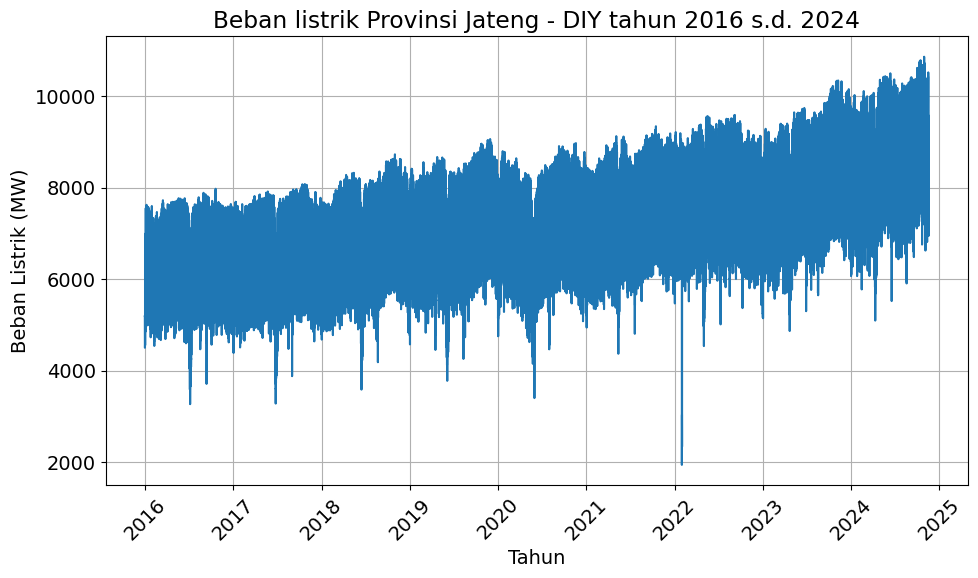

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(df_eda['TANGGAL_JAM'], df_eda['BEBAN'])

plt.title('Beban listrik Provinsi Jateng - DIY tahun 2016 s.d. 2024')
plt.xlabel('Tahun')
plt.ylabel('Beban Listrik (MW)')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))

plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'{DISTRIBUSI_PATH}/beban_listrik_gabungan.pdf', dpi=300)
plt.savefig(f'{DISTRIBUSI_PATH}/beban_listrik_gabungan.png', dpi=300)

plt.show()

# Data 

---
## **2. Boxplot**
---

---
## **3. Plot ACF & PACF**
---